## Суворов Роман ИВТ 2.1


In [139]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import linear_model 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 

%matplotlib inline
plt.style.use('seaborn-v0_8')

In [140]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [141]:
insurance_data.shape

(1338, 7)

In [142]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [143]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [144]:
insurance_data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [145]:
temp_data = insurance_data.copy()

In [ ]:
types = temp_data.dtypes
num_features = list(types[(types != 'object') & (types.index != 'charges')].index)
num_features

['age', 'bmi', 'children']

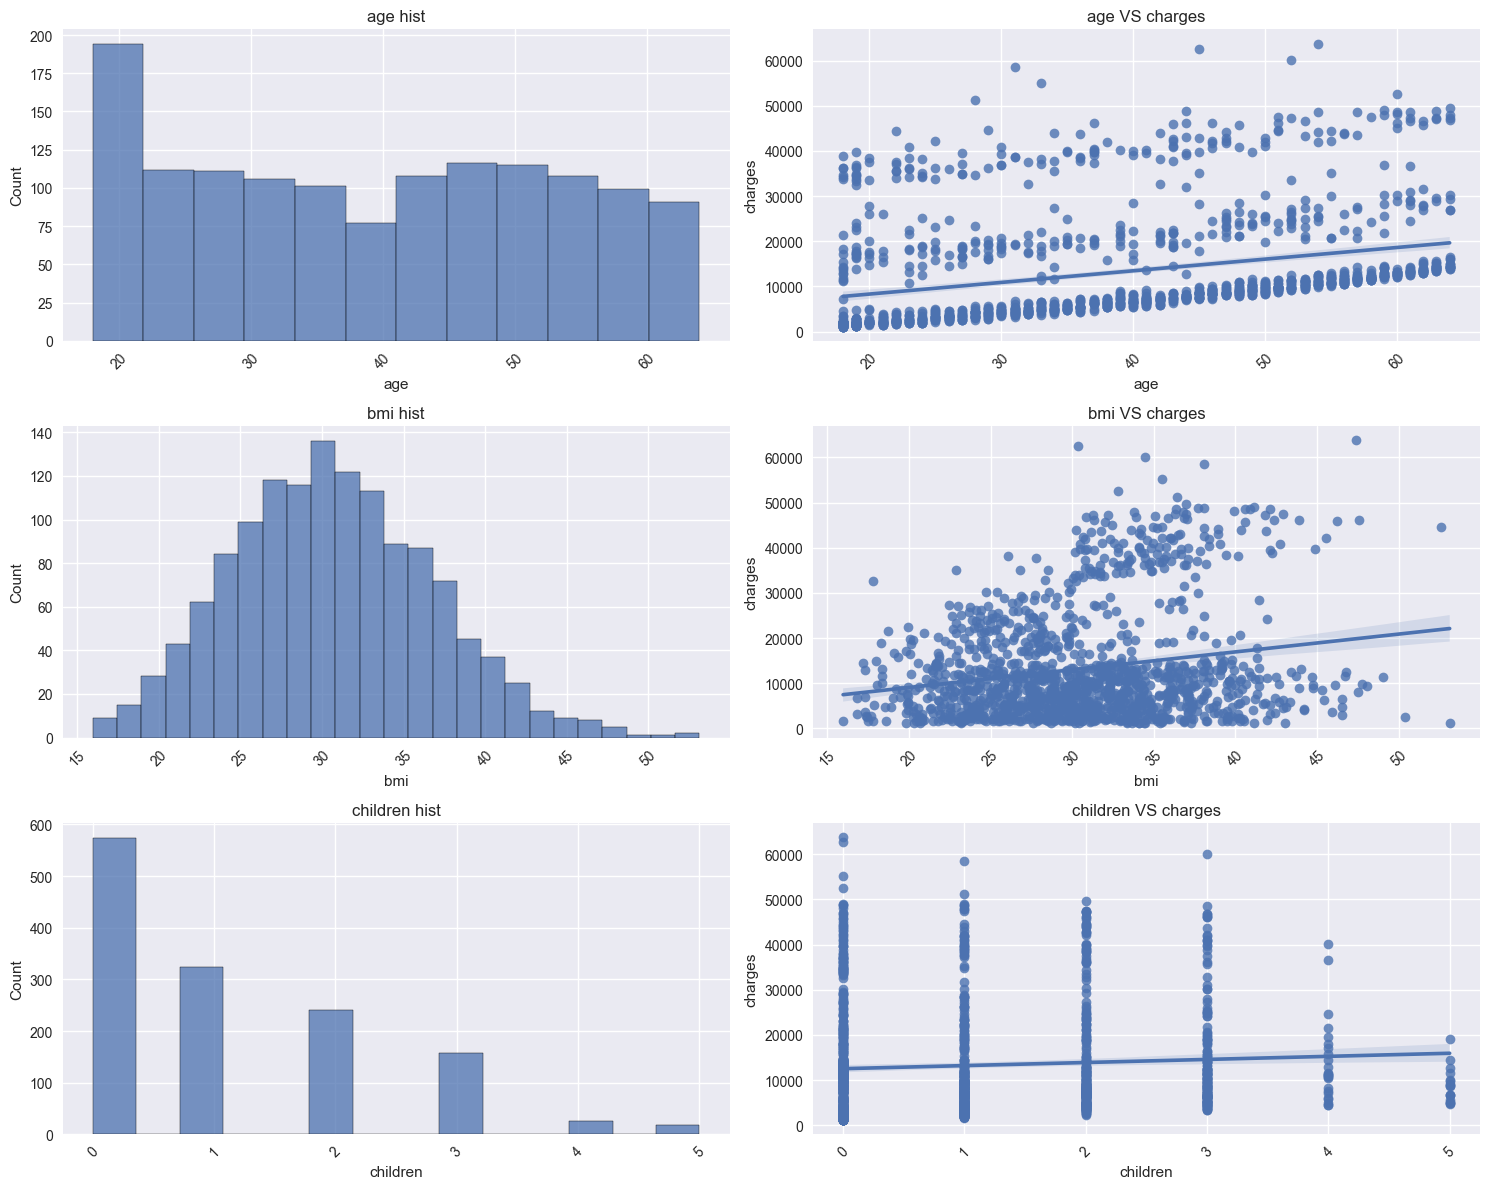

In [ ]:
n = len(num_features) 
fig, axes = plt.subplots(n, 2, figsize=(15, n*4)) 


for i, feature in enumerate(num_features):
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    histplot.set_title(f'{feature} hist')
    histplot.xaxis.set_tick_params(rotation=45)

    regplot = sns.regplot(data=temp_data, x=feature, y='charges', ax=axes[i][1])
    regplot.set_title(f'{feature} VS charges');
    regplot.xaxis.set_tick_params(rotation=45)

plt.tight_layout() 

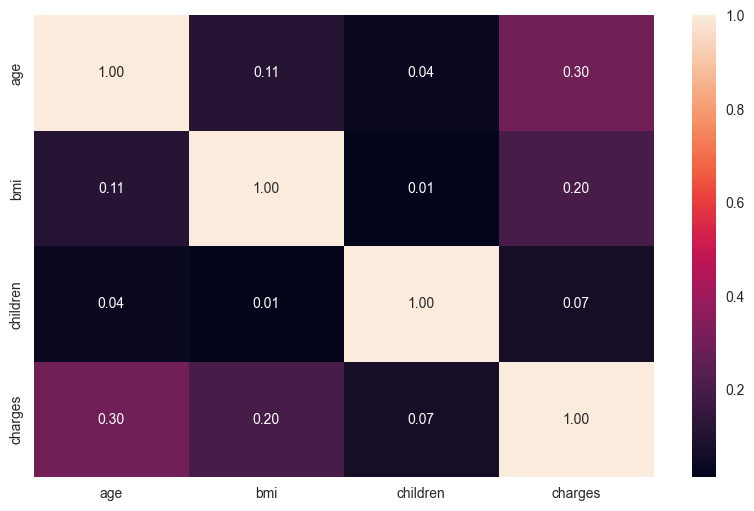

In [ ]:

fig = plt.figure(figsize=(10, 6))
sns.heatmap(temp_data.corr(numeric_only=True), annot=True, fmt='.2f');

In [ ]:
dummies_data = pd.get_dummies(temp_data, columns=['sex', 'smoker', 'region'])
dummies_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
X = dummies_data.drop('charges', axis=1)
y = dummies_data['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42 
)

print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (1070, 11)
Test shape: (268, 11)


In [152]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}%'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.3f}%'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [ ]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208.235
Train MAPE: 42.203%


Test R^2: 0.784
Test MAE: 4181.194
Test MAPE: 46.888%


/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ co

In [ ]:
scaler = preprocessing.MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_lr = linear_model.SGDRegressor(random_state=42)

sgd_lr.fit(X_train_scaled, y_train)

y_train_pred = sgd_lr.predict(X_train_scaled)
y_test_pred = sgd_lr.predict(X_test_scaled)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.741
Train MAE: 4119.545
Train MAPE: 39.145%


Test R^2: 0.783
Test MAE: 4081.035
Test MAPE: 43.705%


/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: Runtim

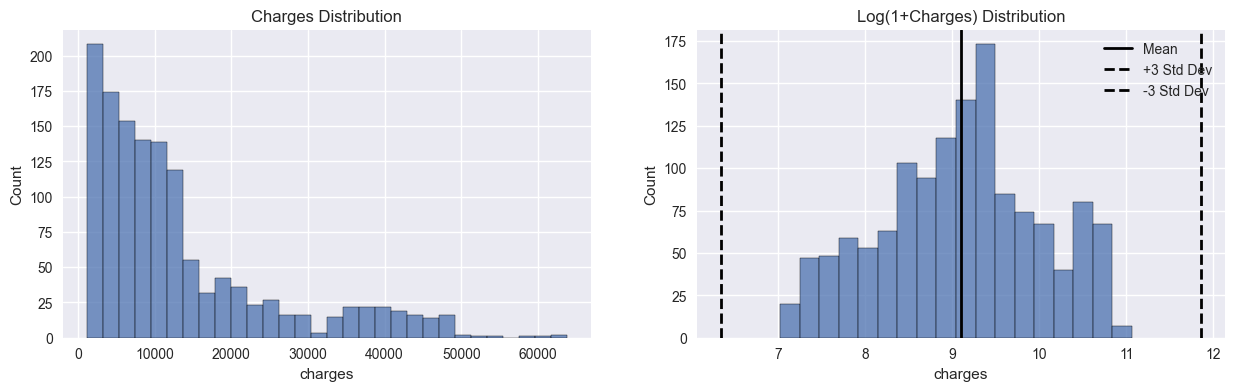

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4)) 

sns.histplot(data=temp_data, x='charges', ax=axes[0]);
axes[0].set_title('Charges Distribution')

log_charges = np.log1p(temp_data['charges'])

sns.histplot(data=log_charges, ax=axes[1]);
axes[1].set_title('Log(1+Charges) Distribution')

mean_log_charges = log_charges.mean()
std_log_charges = log_charges.std()
axes[1].axvline(mean_log_charges, color='k', lw=2, label='Mean')
axes[1].axvline(mean_log_charges + 3 * std_log_charges, color='k', ls='--', lw=2, label='+3 Std Dev')
axes[1].axvline(mean_log_charges - 3 * std_log_charges, color='k', ls='--', lw=2, label='-3 Std Dev')
axes[1].legend();

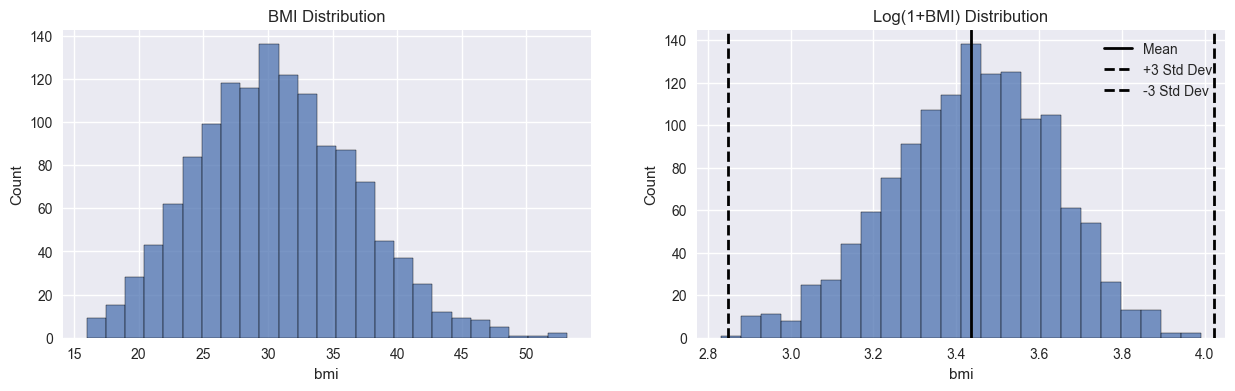

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(data=temp_data, x='bmi', ax=axes[0]);
axes[0].set_title('BMI Distribution')

log_bmi = np.log1p(temp_data['bmi'])
sns.histplot(data=log_bmi, ax=axes[1]);
axes[1].set_title('Log(1+BMI) Distribution')

mean_log_bmi = log_bmi.mean()
std_log_bmi = log_bmi.std()
axes[1].axvline(mean_log_bmi, color='k', lw=2, label='Mean')
axes[1].axvline(mean_log_bmi + 3 * std_log_bmi, color='k', ls='--', lw=2, label='+3 Std Dev')
axes[1].axvline(mean_log_bmi - 3 * std_log_bmi, color='k', ls='--', lw=2, label='-3 Std Dev')
axes[1].legend();

In [ ]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log1p(data[feature])
    else:
        x = data[feature]
    
    mu = x.mean()
    sigma = x.std()

    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma

    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]

    return outliers, cleaned

outliers_charges, temp_cleaned = outliers_z_score(temp_data, 'charges', log_scale=True)
print(f'Shape after cleaning charges outliers: {temp_cleaned.shape}')

outliers_bmi, temp_cleaned = outliers_z_score(temp_cleaned, 'bmi', log_scale=False)
print(f'Shape after cleaning bmi outliers: {temp_cleaned.shape}')

Shape after cleaning charges outliers: (1338, 7)
Shape after cleaning bmi outliers: (1334, 7)


In [ ]:
dummies_data_cleaned = pd.get_dummies(temp_cleaned, columns=['sex', 'smoker', 'region'])
dummies_data_cleaned.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
X_cleaned = dummies_data_cleaned.drop('charges', axis=1)
y_cleaned = dummies_data_cleaned['charges']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, 
    test_size=0.2, 
    random_state=42
)

print('Train shape (cleaned): {}'.format(X_train_cleaned.shape))
print('Test shape (cleaned): {}'.format(X_test_cleaned.shape))

Train shape (cleaned): (1067, 11)
Test shape (cleaned): (267, 11)


In [ ]:
y_train_log = np.log1p(y_train_cleaned)

lr_cleaned = linear_model.LinearRegression()

lr_cleaned.fit(X_train_cleaned, y_train_log)

y_train_pred_cleaned = np.expm1(lr_cleaned.predict(X_train_cleaned))
y_test_pred_cleaned = np.expm1(lr_cleaned.predict(X_test_cleaned))

print("Metrics after cleaning and log-transforming target:")
print_metrics(y_train_cleaned, y_train_pred_cleaned, y_test_cleaned, y_test_pred_cleaned)

Metrics after cleaning and log-transforming target:
Train R^2: 0.493
Train MAE: 4253.365
Train MAPE: 26.389%


Test R^2: 0.601
Test MAE: 4150.301
Test MAPE: 26.563%


/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ co

In [ ]:
scaler_cleaned = preprocessing.MinMaxScaler()

scaler_cleaned.fit(X_train_cleaned)

X_train_scaled_cleaned = scaler_cleaned.transform(X_train_cleaned)
X_test_scaled_cleaned = scaler_cleaned.transform(X_test_cleaned)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train_scaled_cleaned)

X_train_scaled_poly_cleaned = poly.transform(X_train_scaled_cleaned)
X_test_scaled_poly_cleaned = poly.transform(X_test_scaled_cleaned)

print('Train shape (scaled + poly): {}'.format(X_train_scaled_poly_cleaned.shape))
print('Test shape (scaled + poly): {}'.format(X_test_scaled_poly_cleaned.shape))

Train shape (scaled + poly): (1067, 77)
Test shape (scaled + poly): (267, 77)


In [162]:
# Инициализируем объект класса линейная регрессия с L2-регуляризацией (Ridge)
ridge_lr_poly = linear_model.Ridge(random_state=42)

# Обучаем модель предсказывать логарифм целевого признака на полиномиальных признаках
ridge_lr_poly.fit(X_train_scaled_poly_cleaned, y_train_log)

# Делаем предсказание для каждой из выборок
# Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту (expm1)
y_train_pred_poly = np.expm1(ridge_lr_poly.predict(X_train_scaled_poly_cleaned))
y_test_pred_poly = np.expm1(ridge_lr_poly.predict(X_test_scaled_poly_cleaned))

# Выводим результирующие метрики
print("Metrics after Polynomial Features, Scaling and Ridge (default alpha):")
print_metrics(y_train_cleaned, y_train_pred_poly, y_test_cleaned, y_test_pred_poly)

Metrics after Polynomial Features, Scaling and Ridge (default alpha):
Train R^2: 0.822
Train MAE: 2550.817
Train MAPE: 17.043%


Test R^2: 0.829
Test MAE: 2772.591
Test MAPE: 18.632%


/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/pytho

Optimal alpha based on minimum Test MAE: 4.173


/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/pytho

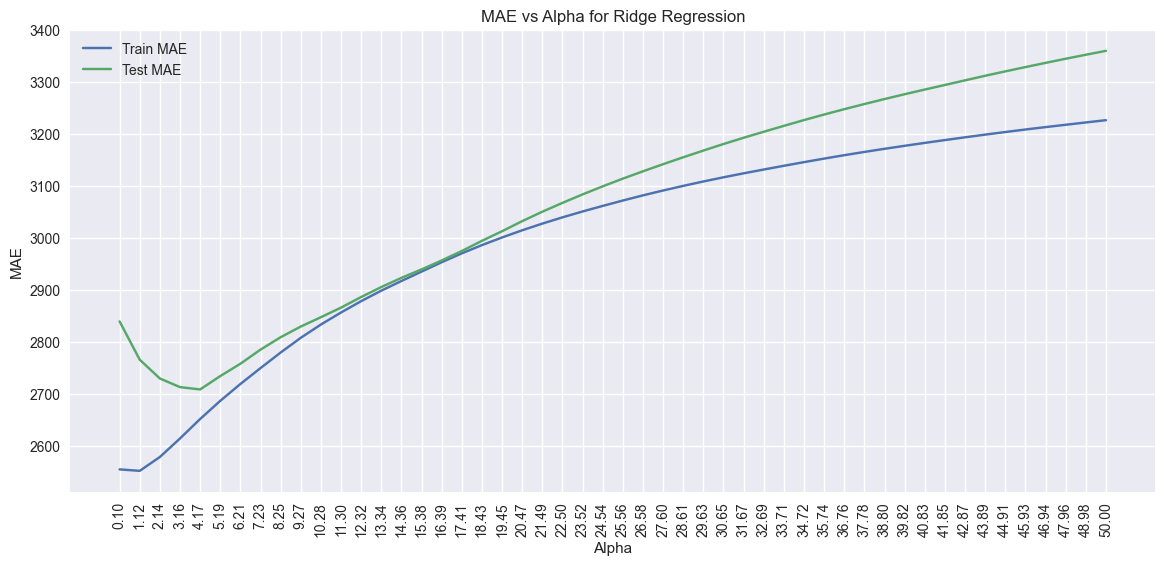

In [163]:
# Создаем список из возможных значений alpha для тюнинга
# Подбираем диапазон, который может быть релевантен для MAE
alpha_list = np.linspace(0.1, 50, 50) # Использование более широкого диапазона для страховых расходов

# Создаем пустые списки, в которые будем добавлять результаты метрик
train_mae_scores = []
test_mae_scores = []

for alpha in alpha_list:
    # Создаем объект класса Ridge с текущим значением alpha
    # Увеличим max_iter на случай большого количества признаков после полиномиальных преобразований
    ridge_lr = linear_model.Ridge(alpha=alpha, max_iter=10000, random_state=42)

    # Обучаем модель предсказывать логарифм целевого признака на полиномиальных признаках
    ridge_lr.fit(X_train_scaled_poly_cleaned, y_train_log)

    # Делаем предсказание и преобразуем обратно
    y_train_predict = np.expm1(ridge_lr.predict(X_train_scaled_poly_cleaned))
    y_test_predict = np.expm1(ridge_lr.predict(X_test_scaled_poly_cleaned))

    # Рассчитываем метрику MAE для двух выборок и добавляем их в списки
    train_mae = metrics.mean_absolute_error(y_train_cleaned, y_train_predict)
    test_mae = metrics.mean_absolute_error(y_test_cleaned, y_test_predict)
    train_mae_scores.append(train_mae)
    test_mae_scores.append(test_mae)

# Визуализируем изменение MAE в зависимости от alpha
fig, ax = plt.subplots(figsize=(14, 6)) #фигура + координатная плоскость

ax.plot(alpha_list, train_mae_scores, label='Train MAE') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_mae_scores, label='Test MAE') #линейный график для тестовой выборки

ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('MAE') #название оси ординат
ax.set_title('MAE vs Alpha for Ridge Regression')
ax.set_xticks(alpha_list) #метки по оси абцисс
ax.xaxis.set_tick_params(rotation=90) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды
ax.grid(True)

# Найдем alpha, при котором тестовый MAE минимален
optimal_alpha_index = np.argmin(test_mae_scores)
optimal_alpha = alpha_list[optimal_alpha_index]
print(f'Optimal alpha based on minimum Test MAE: {optimal_alpha:.3f}')

In [164]:
# Создаем объект класса Ridge с подобранным значением alpha
# Используем оптимальное alpha, найденное на предыдущем шаге
best_ridge_lr = linear_model.Ridge(alpha=optimal_alpha, max_iter=10000, random_state=42)

# Обучаем финальную модель предсказывать логарифм целевого признака
best_ridge_lr.fit(X_train_scaled_poly_cleaned, y_train_log)

# Делаем предсказание для каждой из выборок
# Преобразуем обратно из логарифмической шкалы
y_train_pred_final = np.expm1(best_ridge_lr.predict(X_train_scaled_poly_cleaned))
y_test_pred_final = np.expm1(best_ridge_lr.predict(X_test_scaled_poly_cleaned))

print("Final Metrics with Tuned Ridge Regression:")
print_metrics(y_train_cleaned, y_train_pred_final, y_test_cleaned, y_test_pred_final)

Final Metrics with Tuned Ridge Regression:
Train R^2: 0.817
Train MAE: 2651.961
Train MAPE: 17.957%


Test R^2: 0.849
Test MAE: 2708.875
Test MAPE: 19.220%


/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/arkadijnetot/Documents/projects/3-course/venv/lib/pytho

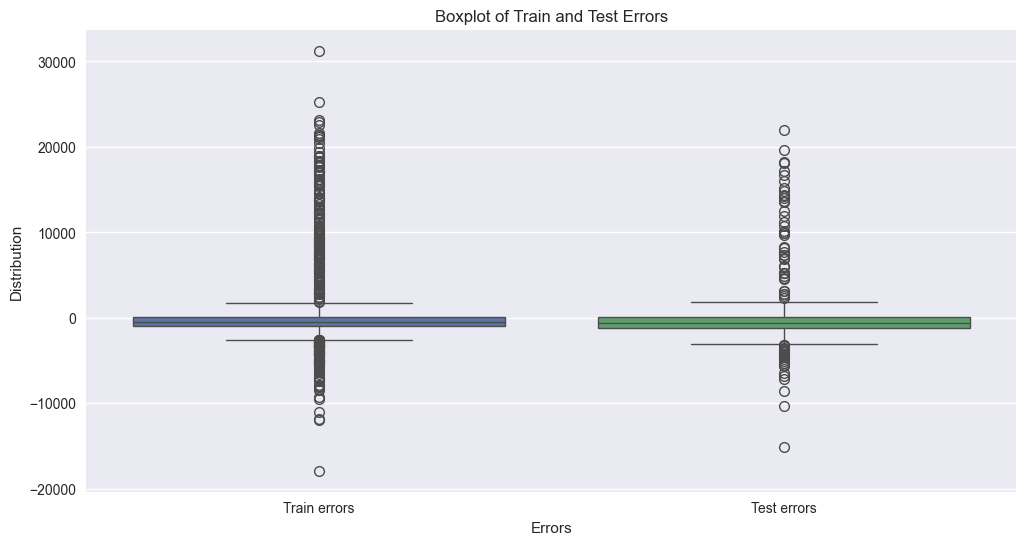

In [165]:
# Визуализируем ошибки финальной модели
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость

# Ошибки модели на тренировочной выборке 
y_train_errors = y_train_cleaned - y_train_pred_final

# Ошибки модели на тестовой выборке
y_test_errors = y_test_cleaned - y_test_pred_final

# Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)

# Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)

ax.set_xlabel('Errors') #название оси абсцисс
ax.set_ylabel('Distribution'); #название оси ординат
ax.set_title('Boxplot of Train and Test Errors');